<img src="images/csdms_logo.jpg">

# Using a BMI: Waves

This example explores how to use a BMI implementation using the [Waves model](http://csdms.colorado.edu/wiki/Model_help:Waves) as an example.

## Links

* [Waves source code](https://github.com/csdms/cem-old/tree/mcflugen/add-function-pointers): Look at the files that have *waves* in their name.
* [Waves description on CSDMS](http://csdms.colorado.edu/wiki/Model_help:Waves): Detailed information on the Waves model.

# Interacting with the Waves BMI using Python

Some magic that allows us to view images within the notebook.

In [1]:
from __future__ import print_function

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

Import the `Waves` class, and instantiate it. In Python, a model with a BMI will have no arguments for its constructor. Note that although the class has been instantiated, it's not yet ready to be run. We'll get to that later!

In [2]:
from pymt import plugins
waves = plugins.Waves()

✓ Sedflux3D
✓ Child
✓ Hydrotrend
✓ OverlandFlow
✓ BmiFrostNumberMethod
✓ BmiKuMethod
✓ Cem
/Users/huttone/git/csdms/model_metadata/model_metadata/modelmetadata.py:62: UserWarning: _name: ignoring private attribute in parameters section
  name=name
✓ Waves
/Users/huttone/git/csdms/model_metadata/model_metadata/modelmetadata.py:62: UserWarning: _name: ignoring private attribute in parameters section
  name=name
/Users/huttone/git/csdms/model_metadata/model_metadata/modelmetadata.py:62: UserWarning: _name: ignoring private attribute in parameters section
  name=name


Even though we can't run our waves model yet, we can still get some information about it. *Just don't try to run it.* Some things we can do with our model are get the names of the input variables.

In [3]:
waves.get_output_var_names()

('sea_surface_water_wave__min_of_increment_of_azimuth_angle_of_opposite_of_phase_velocity',
 'sea_surface_water_wave__azimuth_angle_of_opposite_of_phase_velocity',
 'sea_surface_water_wave__mean_of_increment_of_azimuth_angle_of_opposite_of_phase_velocity',
 'sea_surface_water_wave__max_of_increment_of_azimuth_angle_of_opposite_of_phase_velocity',
 'sea_surface_water_wave__height',
 'sea_surface_water_wave__period')

Or the output variables.

In [4]:
waves.get_input_var_names()

('sea_surface_water_wave__height',
 'sea_surface_water_wave__period',
 'sea_shoreline_wave~incoming~deepwater__ashton_et_al_approach_angle_highness_parameter',
 'sea_shoreline_wave~incoming~deepwater__ashton_et_al_approach_angle_asymmetry_parameter')

We can also get information about specific variables. Here we'll look at some info about wave direction. This is the main output of the Waves model. Notice that BMI components always use [CSDMS standard names](http://csdms.colorado.edu/wiki/CSDMS_Standard_Names). The CSDMS Standard Name for wave angle is,

    "sea_surface_water_wave__azimuth_angle_of_opposite_of_phase_velocity"

Quite a mouthful, I know. With that name we can get information about that variable and the grid that it is on (it's actually not a one).

In [6]:
angle_name = 'sea_surface_water_wave__azimuth_angle_of_opposite_of_phase_velocity'

print("Data type: %s" % waves.get_var_type(angle_name))
print("Units: %s" % waves.get_var_units(angle_name))
print("Grid id: %d" % waves.get_var_grid(angle_name))
print("Number of elements in grid: %d" % waves.get_grid_size(0))
print("Type of grid: %s" % waves.get_grid_type(0))

Data type: float64
Units: radians
Grid id: 0
Number of elements in grid: 1
Type of grid: scalar


/Users/huttone/anaconda/envs/sedflux_pymt/lib/python3.6/site-packages/pymt/utils/decorators.py:60: UserWarning: Call to deprecated function get_grid_size.
  name=func.__name__


In [7]:
args = waves.setup()

OK. We're finally ready to run the model. Well not quite. First we initialize the model with the BMI **initialize** method. Normally we would pass it a string that represents the name of an input file. For this example we'll pass **None**, which tells Waves to use some defaults.

In [8]:
waves.initialize(*args)

Before running the model, let's set a couple input parameters. These two parameters represent the frequency for which waves approach the shore at a high angle and if they come from a prefered direction.

In [9]:
waves.set_value('sea_shoreline_wave~incoming~deepwater__ashton_et_al_approach_angle_asymmetry_parameter', .25)
waves.set_value('sea_shoreline_wave~incoming~deepwater__ashton_et_al_approach_angle_highness_parameter', .7)

array([ 0.7])

To advance the model in time, we use the **update** method. We'll advance the model one day. 

In [10]:
waves.update()

Let's double-check that the model advanced to the given time and see what the new wave angle is.

In [11]:
print('Current model time: %f' % waves.get_current_time())
val = waves.get_value(angle_name)
print('The current wave angle is: %f' % val[0])

Current model time: 1.000000
The current wave angle is: -0.089950


We'll put all this in a loop and advance the model in time to generate a time series of waves angles.

In [12]:
number_of_time_steps = 400
angles = np.empty(number_of_time_steps)
for time in range(number_of_time_steps):
    waves.update()
    angles[time] = waves.get_value(angle_name)

Text(0, 0.5, 'Incoming wave angle (degrees)')

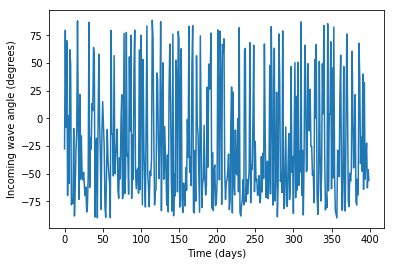

In [13]:
plt.plot(np.array(angles) * 180 / np.pi)
plt.xlabel('Time (days)')
plt.ylabel('Incoming wave angle (degrees)')

Text(0, 0.5, 'Number of occurences')

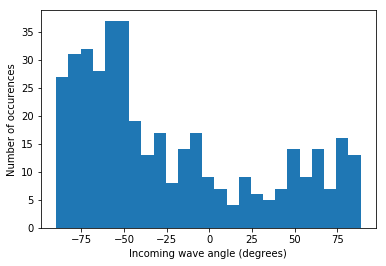

In [14]:
plt.hist(np.array(angles) * 180 / np.pi, bins=25)
plt.xlabel('Incoming wave angle (degrees)')
plt.ylabel('Number of occurences')